In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
!pip install sqlalchemy


In [ ]:

from sqlalchemy import create_engine


# Connent with  SQLite
engine = create_engine('sqlite:///pharma_sales.db')



pharma_sales_data.to_sql('sales_data', con=engine, if_exists='replace', index=False)


query = "SELECT * FROM sales_data"
df_from_sql = pd.read_sql(query, con=engine)
print(df_from_sql.head())


                        datum   M01AB    M01AE    N02BA     N02BE   N05B  \
0  2014-01-31 00:00:00.000000  127.69   99.090  152.100   878.030  354.0   
1  2014-02-28 00:00:00.000000  133.32  126.050  177.000  1001.900  347.0   
2  2014-03-31 00:00:00.000000  137.44   92.950  147.655   779.275  232.0   
3  2014-04-30 00:00:00.000000  113.10   89.475  130.900   698.500  209.0   
4  2014-05-31 00:00:00.000000  101.79  119.933  132.100   628.780  270.0   

   N05C    R03    R06  
0  50.0  112.0   48.2  
1  31.0  122.0   36.2  
2  20.0  112.0   85.4  
3  18.0   97.0   73.7  
4  23.0  107.0  123.7  


In [ ]:

query = "SELECT * FROM sales_data WHERE datum BETWEEN '2014-01-01' AND '2019-12-31'"
df_filtered = pd.read_sql(query, con=engine)
print(df_filtered.head())


                        datum   M01AB    M01AE    N02BA     N02BE   N05B  \
0  2014-01-31 00:00:00.000000  127.69   99.090  152.100   878.030  354.0   
1  2014-02-28 00:00:00.000000  133.32  126.050  177.000  1001.900  347.0   
2  2014-03-31 00:00:00.000000  137.44   92.950  147.655   779.275  232.0   
3  2014-04-30 00:00:00.000000  113.10   89.475  130.900   698.500  209.0   
4  2014-05-31 00:00:00.000000  101.79  119.933  132.100   628.780  270.0   

   N05C    R03    R06  
0  50.0  112.0   48.2  
1  31.0  122.0   36.2  
2  20.0  112.0   85.4  
3  18.0   97.0   73.7  
4  23.0  107.0  123.7  


In [ ]:
pharma_sales_data = pd.read_csv(monthly_path)
#SQL

In [ ]:
#SQL
from sqlalchemy import create_engine
engine = create_engine('sqlite:///pharma_sales.db')


pharma_sales_data.to_sql('sales_data', con=engine, if_exists='replace', index=False)


70

In [ ]:

query = "SELECT datum, M01AB, M01AE, N02BA FROM sales_data WHERE datum BETWEEN '2014-01-01' AND '2019-12-31'"
df_filtered = pd.read_sql(query, con=engine)
print(df_filtered.head())


        datum   M01AB    M01AE    N02BA
0  2014-01-31  127.69   99.090  152.100
1  2014-02-28  133.32  126.050  177.000
2  2014-03-31  137.44   92.950  147.655
3  2014-04-30  113.10   89.475  130.900
4  2014-05-31  101.79  119.933  132.100


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
import warnings
warnings.filterwarnings("ignore")
import random
random.seed(42)

# File paths
daily_path = "/content/drive/MyDrive/Pharma sales data/salesdaily.csv"
hourly_path = "/content/drive/MyDrive/Pharma sales data/saleshourly.csv"
monthly_path = "/content/drive/MyDrive/Pharma sales data/salesmonthly.csv"
weekly_path = "/content/drive/MyDrive/Pharma sales data/salesweekly.csv"


pharma_sales_data = pd.read_csv(monthly_path)
print(pharma_sales_data.head())


print(pharma_sales_data.dtypes)


pharma_sales_data['datum'] = pd.to_datetime(pharma_sales_data['datum'], format='%Y-%m-%d')

print(pharma_sales_data.dtypes)

# Basic information about the data
print(pharma_sales_data.info())

# Preview the first and last rows
print(pharma_sales_data.head())
print(pharma_sales_data.tail())

# Generate a range of dates
dates_expected = pd.date_range(start='2014-01-01', end='2019-12-31', freq='M')

# Get unique dates from the DataFrame
dates_in_dataframe = pd.to_datetime(pharma_sales_data['datum'].dt.strftime('%Y-%m-%d')).unique()

# Check for missing dates
for year in range(2014, 2020):
    missing_dates = [date for date in dates_expected if date.year == year and date not in dates_in_dataframe]
    if missing_dates:
        print(f"Year {year}: Missing dates - {missing_dates}")
    else:
        print(f"Year {year}: All dates are present.")


        datum   M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03    R06
0  2014-01-31  127.69   99.090  152.100   878.030  354.0  50.0  112.0   48.2
1  2014-02-28  133.32  126.050  177.000  1001.900  347.0  31.0  122.0   36.2
2  2014-03-31  137.44   92.950  147.655   779.275  232.0  20.0  112.0   85.4
3  2014-04-30  113.10   89.475  130.900   698.500  209.0  18.0   97.0   73.7
4  2014-05-31  101.79  119.933  132.100   628.780  270.0  23.0  107.0  123.7
datum     object
M01AB    float64
M01AE    float64
N02BA    float64
N02BE    float64
N05B     float64
N05C     float64
R03      float64
R06      float64
dtype: object
datum    datetime64[ns]
M01AB           float64
M01AE           float64
N02BA           float64
N02BE           float64
N05B            float64
N05C            float64
R03             float64
R06             float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype     

In [ ]:
df_1 = deepcopy(pharma_sales_data)

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'df_1' is your DataFrame


columns = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']


for column in columns:
    data = df_1[column]


    adf_result = adfuller(data)

    print(f'Column: {column}')
    print('ADF Statistic:', adf_result[0])
    print('p-value:', adf_result[1])
    print('Critical Values:', adf_result[4])
    print("\n")



Column: M01AB
ADF Statistic: -5.367074694097212
p-value: 3.970457755741786e-06
Critical Values: {'1%': -3.528889992207215, '5%': -2.9044395987933362, '10%': -2.589655654274312}


Column: M01AE
ADF Statistic: -6.5784272421227605
p-value: 7.621247821188844e-09
Critical Values: {'1%': -3.528889992207215, '5%': -2.9044395987933362, '10%': -2.589655654274312}


Column: N02BA
ADF Statistic: -2.795159178134275
p-value: 0.058968579012579826
Critical Values: {'1%': -3.530398990560757, '5%': -2.9050874099328317, '10%': -2.5900010121107266}


Column: N02BE
ADF Statistic: -3.593004011289762
p-value: 0.0058961932204407656
Critical Values: {'1%': -3.530398990560757, '5%': -2.9050874099328317, '10%': -2.5900010121107266}


Column: N05B
ADF Statistic: -3.0395958896585666
p-value: 0.03135847554939454
Critical Values: {'1%': -3.528889992207215, '5%': -2.9044395987933362, '10%': -2.589655654274312}


Column: N05C
ADF Statistic: -6.767653567958277
p-value: 2.6914857820500915e-09
Critical Values: {'1%': -3

In [ ]:
# Adding new rows using pd.concat
new_rows = pd.DataFrame([
    {'datum': pd.to_datetime('2019-11-30')},
    {'datum': pd.to_datetime('2019-12-31')}
])
df_1 = pd.concat([df_1, new_rows], ignore_index=True)


for category in df_1.columns.difference(['datum']):
    # Calculating the median for each category up to October 2019 inclusive
    median = df_1.loc[df_1['datum'] < '2019-11-01', category].median()


    df_1.loc[df_1['datum'] == '2019-11-30', category] = median
    df_1.loc[df_1['datum'] == '2019-12-31', category] = median

# Displaying the last two rows
print(df_1.tail(2))


        datum    M01AB   M01AE    N02BA     N02BE   N05B  N05C    R03   R06
70 2019-11-30  154.635  114.84  117.225  865.8245  250.3  18.0  160.0  74.1
71 2019-12-31  154.635  114.84  117.225  865.8245  250.3  18.0  160.0  74.1


In [ ]:
df_1.head()
df_1.tail()
pharma_sales_data = deepcopy(df_1)
df_1.loc[:,'datum'] = df_1.datum.dt.year
df_1 = df_1.groupby('datum').sum() # Calculating the sales quantity for each drug class in each year

In [ ]:
df_1

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
datum,,,,,,,,
2014,1510.77,1333.594,1683.279,10094.555,4355.0,303.0,1277.00,828.30
2015,1905.62,1496.603,1608.630,11997.350,2965.0,159.0,1776.25,983.03
2016,2125.06,1604.441,1664.800,13435.830,3278.5,207.0,2137.00,1065.07
2017,1653.79,1214.485,1091.150,7674.919,2078.0,142.0,1732.00,919.61
2018,1786.93,1389.656,1123.800,11263.675,3266.2,242.0,2765.00,1196.80
2019,1826.54,1346.901,1114.250,9743.265,2906.2,232.0,2370.00,1221.77


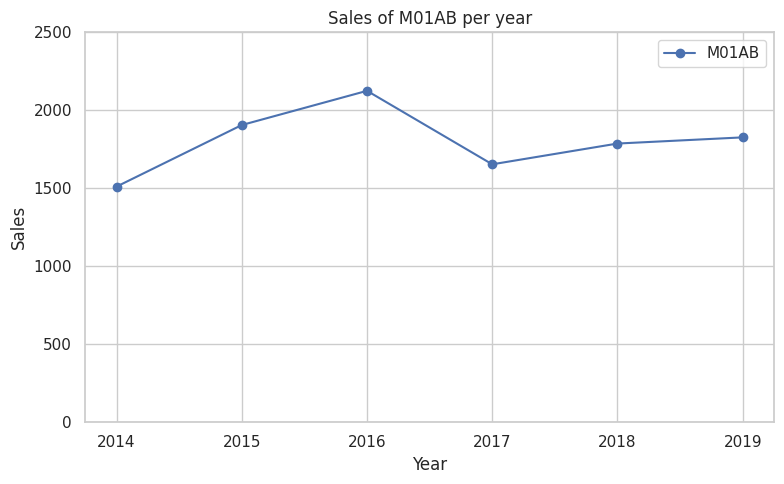

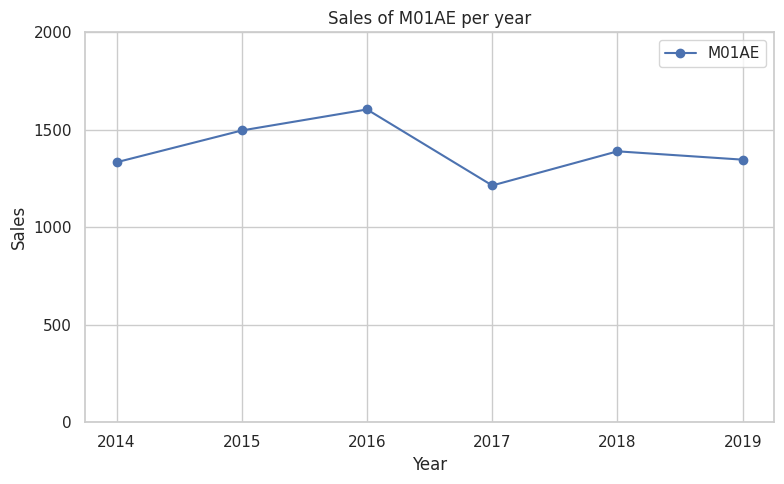

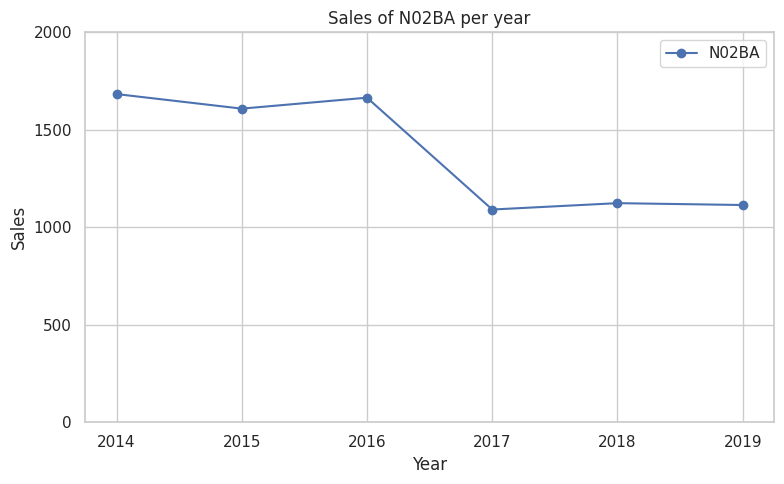

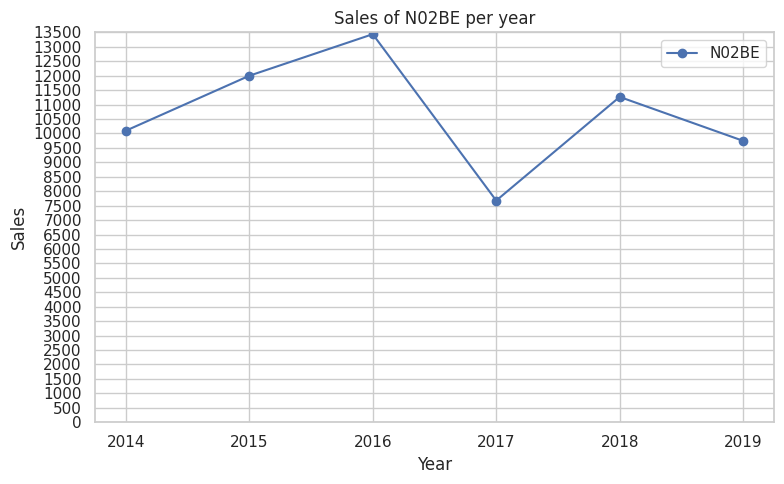

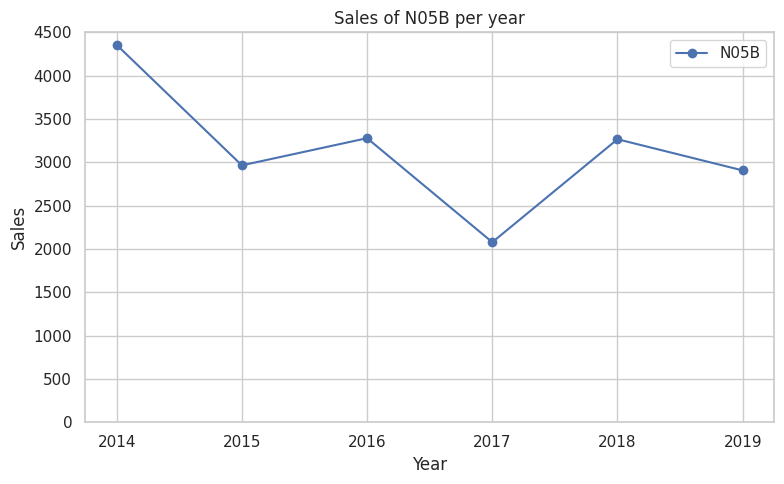

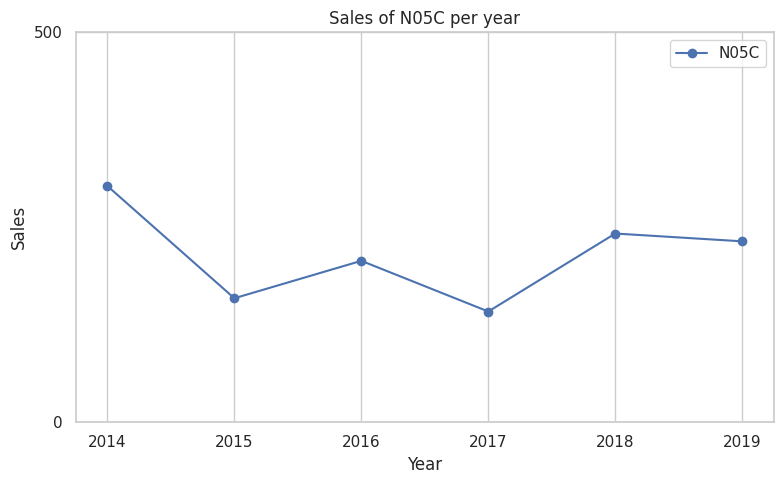

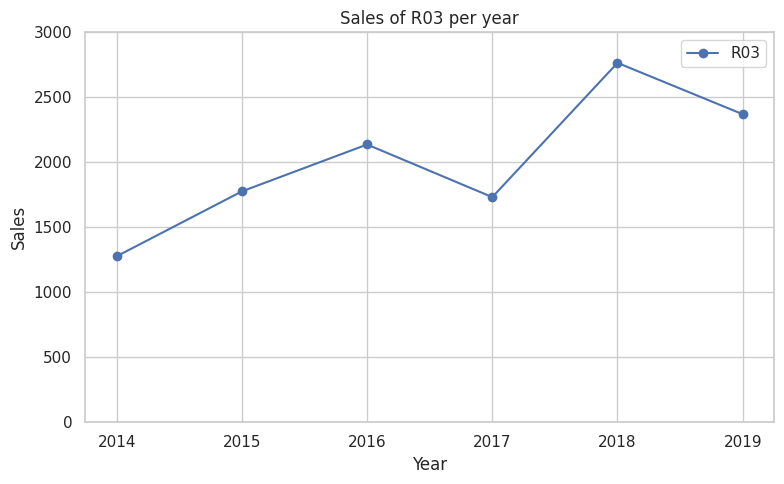

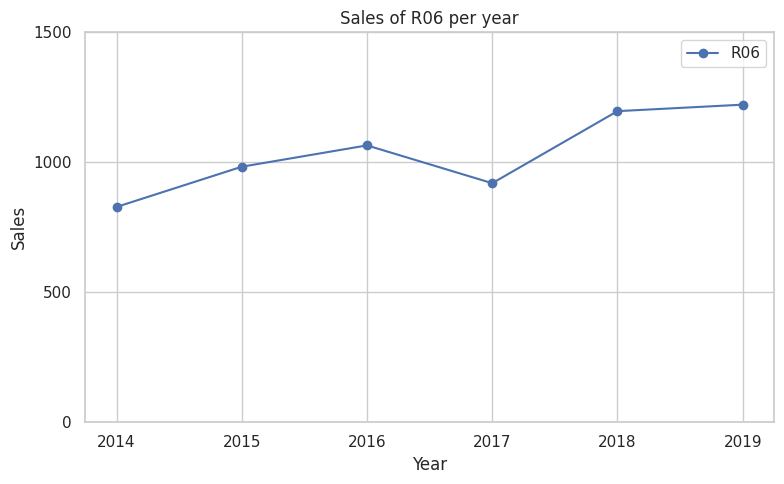

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

for column in df_1.columns:
    plt.figure(figsize=(8, 5))


    max_value = df_1[column].max()

    # Round up to the next multiple of 500
    max_value = int((max_value + 499) // 500) * 500

    plt.plot(df_1.index, df_1[column], marker='o', linestyle='-', label=column)

    plt.xlabel('Year')
    plt.ylabel('Sales')
    plt.title(f'Sales of {column} per year')
    plt.legend()
    plt.grid(True)

    plt.yticks(range(0, max_value + 1, 500))
    plt.ylim(0, max_value)

    plt.tight_layout()
    plt.show()




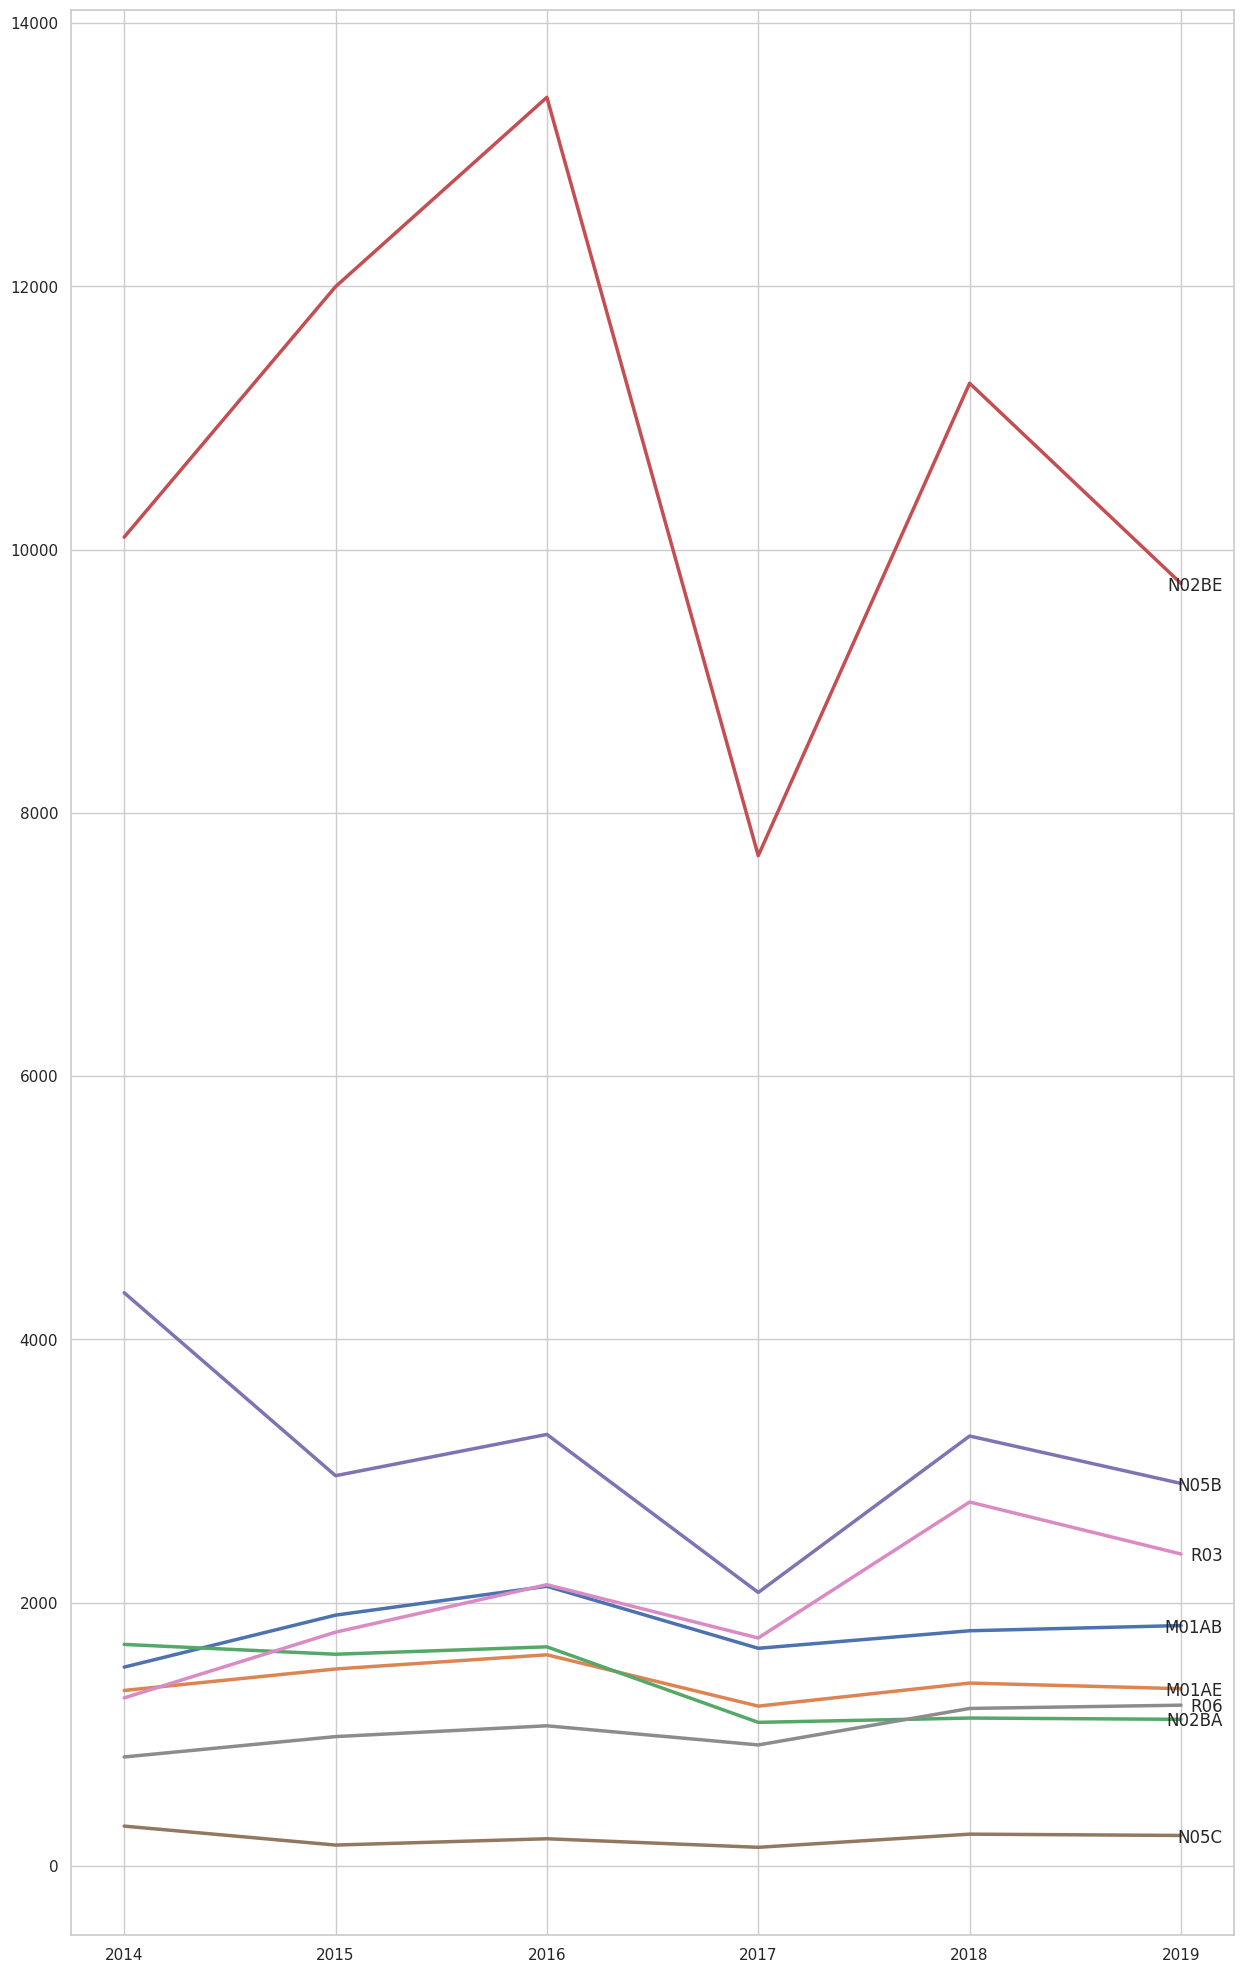

In [ ]:
plt.figure(figsize=(15, 25))

for column in df_1.columns:
    # Plot the column without legend
    plt.plot(df_1[column], label='_nolegend_', linewidth=2.5)

    # Add the column name as a label next to the line (positioned at each line's endpoint)
    x_values = df_1.index
    y_values = df_1[column]
    x_pos = x_values[-1]
    y_pos = y_values.iloc[-1]

    # Annotate each line individually
    plt.annotate(column, xy=(x_pos, y_pos), xytext=(30, -5), textcoords='offset points', ha='right', fontsize=12)

plt.show()


In [ ]:
# First, let's select the data for the years 2014 (our start-point) and 2019 (our end-point)
df_1 = df_1.loc[(df_1.index == 2014) | (df_1.index == 2019)]
df_1.head()


,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
datum,,,,,,,,
2014,1510.77,1333.594,1683.279,10094.555,4355.0,303.0,1277.0,828.30
2019,1826.54,1346.901,1114.250,9743.265,2906.2,232.0,2370.0,1221.77


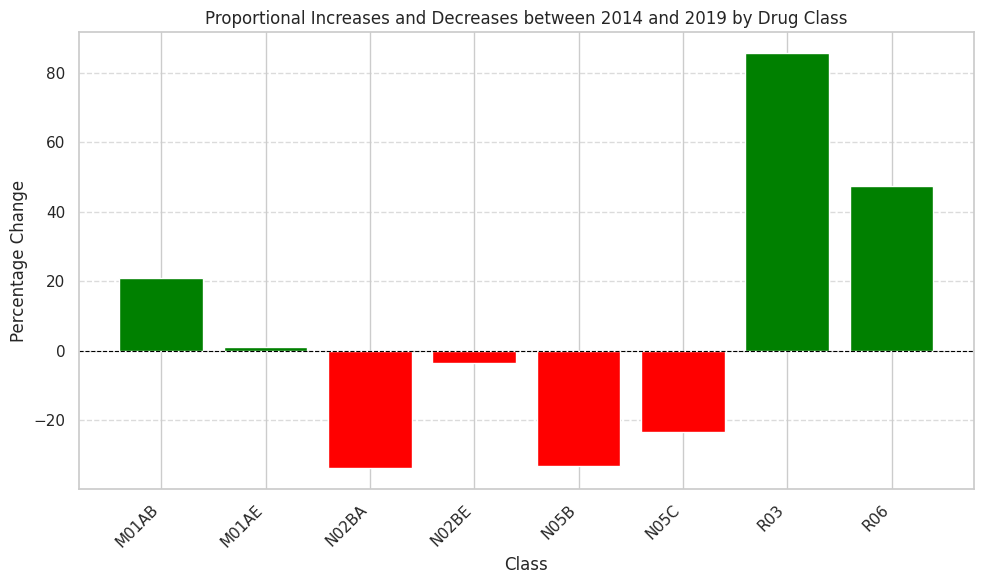

In [ ]:
# Create an empty DataFrame with the appropriate columns
delta_df = pd.DataFrame(columns=['Class', 'Percentage Change'])


for column in df_1.columns:
    initial = df_1.loc[2014, column]
    final = df_1.loc[2019, column]

    percentage_change = ((final - initial) / initial) * 100


    new_row = pd.DataFrame({'Class': [column], 'Percentage Change': [percentage_change]})
    delta_df = pd.concat([delta_df, new_row], ignore_index=True)

# Plot a bar chart showing the percentage changes for each drug class
plt.figure(figsize=(10, 6))
plt.bar(delta_df['Class'], delta_df['Percentage Change'], color=['green' if x >= 0 else 'red' for x in delta_df['Percentage Change']])
plt.xlabel('Class')
plt.ylabel('Percentage Change')
plt.title('Proportional Increases and Decreases between 2014 and 2019 by Drug Class')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
pharma_sales_data.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [ ]:
# To answer this question, let's start again by preparing our data in the format we need
# To do this, we will create a sample of the data grouped by month, regardless of the year
df_2 = deepcopy(pharma_sales_data)
df_2.loc[:, 'month'] = df_2.datum.dt.month
df_2 = df_2.groupby('month').mean()  # Calculating the average sales by month
df_2 = round(df_2, 2)


In [ ]:
df_2

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
month,,,,,,,,,
1,2016-08-01 00:00:00,124.54,114.94,111.07,1032.26,265.03,22.00,178.04,39.58
2,2016-08-29 04:00:00,137.44,127.63,127.48,993.83,248.40,15.17,195.17,46.73
3,2016-09-29 04:00:00,152.28,123.14,123.81,927.92,256.23,19.33,204.17,98.72
4,2016-10-29 04:00:00,153.54,107.70,112.32,776.82,239.90,15.50,184.50,141.12
5,2016-11-29 04:00:00,150.23,113.14,115.19,714.66,235.30,18.83,163.33,155.09
6,2016-12-29 04:00:00,141.44,107.04,115.95,624.25,242.50,17.67,130.50,133.11
7,2017-01-29 04:00:00,164.58,117.02,107.98,610.26,257.27,14.83,91.67,104.12
8,2017-03-01 04:00:00,169.95,112.36,107.79,654.82,281.67,19.00,96.17,83.38
9,2017-03-31 04:00:00,150.15,119.10,102.89,960.86,277.22,15.67,138.67,77.20


In [ ]:
#Let's create a second sample containing month and year to check if there are any peculiarities associated with the month and year
df_2y = deepcopy(pharma_sales_data)
df_2y.loc[:,'year'] = df_2y.datum.dt.year
df_2y.loc[:,'month'] = df_2y.datum.dt.month
df_2y = df_2y.drop('datum', axis=1)
df_2y

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,year,month
0,127.690,99.090,152.100,878.0300,354.0,50.0,112.0,48.20,2014,1
1,133.320,126.050,177.000,1001.9000,347.0,31.0,122.0,36.20,2014,2
2,137.440,92.950,147.655,779.2750,232.0,20.0,112.0,85.40,2014,3
3,113.100,89.475,130.900,698.5000,209.0,18.0,97.0,73.70,2014,4
4,101.790,119.933,132.100,628.7800,270.0,23.0,107.0,123.70,2014,5
...,...,...,...,...,...,...,...,...,...,...
67,181.910,88.269,84.200,518.1000,237.0,26.0,145.0,97.30,2019,8
68,161.070,111.437,93.500,984.4800,227.8,16.0,161.0,109.10,2019,9
69,44.370,37.300,20.650,295.1500,86.0,7.0,37.0,11.13,2019,10
70,154.635,114.840,117.225,865.8245,250.3,18.0,160.0,74.10,2019,11


In [ ]:
df_2 = df_2.drop('datum', axis=1)



Text(0.12, 0.51, 'Average')

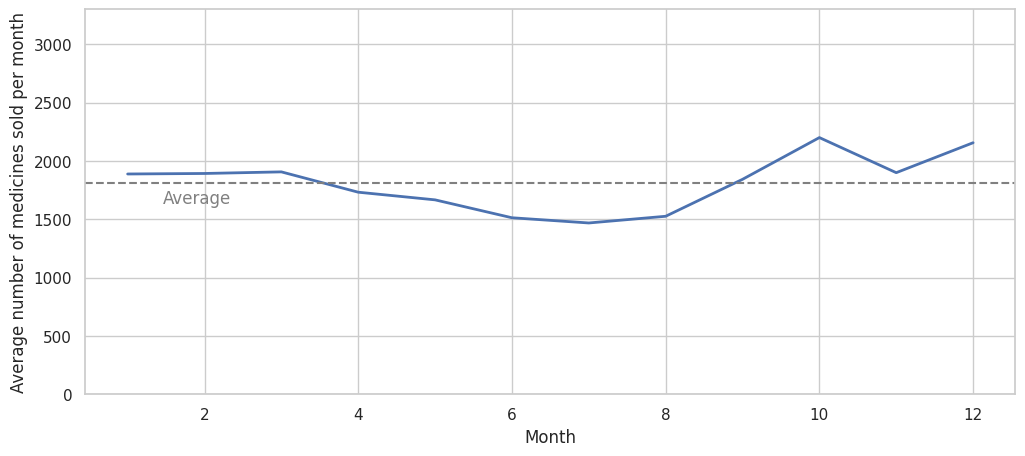

In [ ]:
#Let's check how the average sales behave over the months, regardless of the product
df_2a = df_2.sum(axis=1)
df_2a = pd.DataFrame(df_2a)
df_2a = df_2a.rename(columns={0:'total'})

df2ax = sns.lineplot(x = df_2a.index, y=df_2a.total, **{'lw':'2'})
df2ax.figure.set_size_inches(12, 5)
df2ax.set(xlabel='Month', ylabel='Average number of medicines sold per month')
plt.ylim(0, df_2a['total'].max()*1.5)
plt.axhline(df_2a.total.mean(),xmin=0, xmax=1, color='grey', **{'ls':'--'})
plt.text(0.12, 0.51, 'Average', horizontalalignment='center',
     verticalalignment='center', transform=df2ax.transAxes, color='grey')

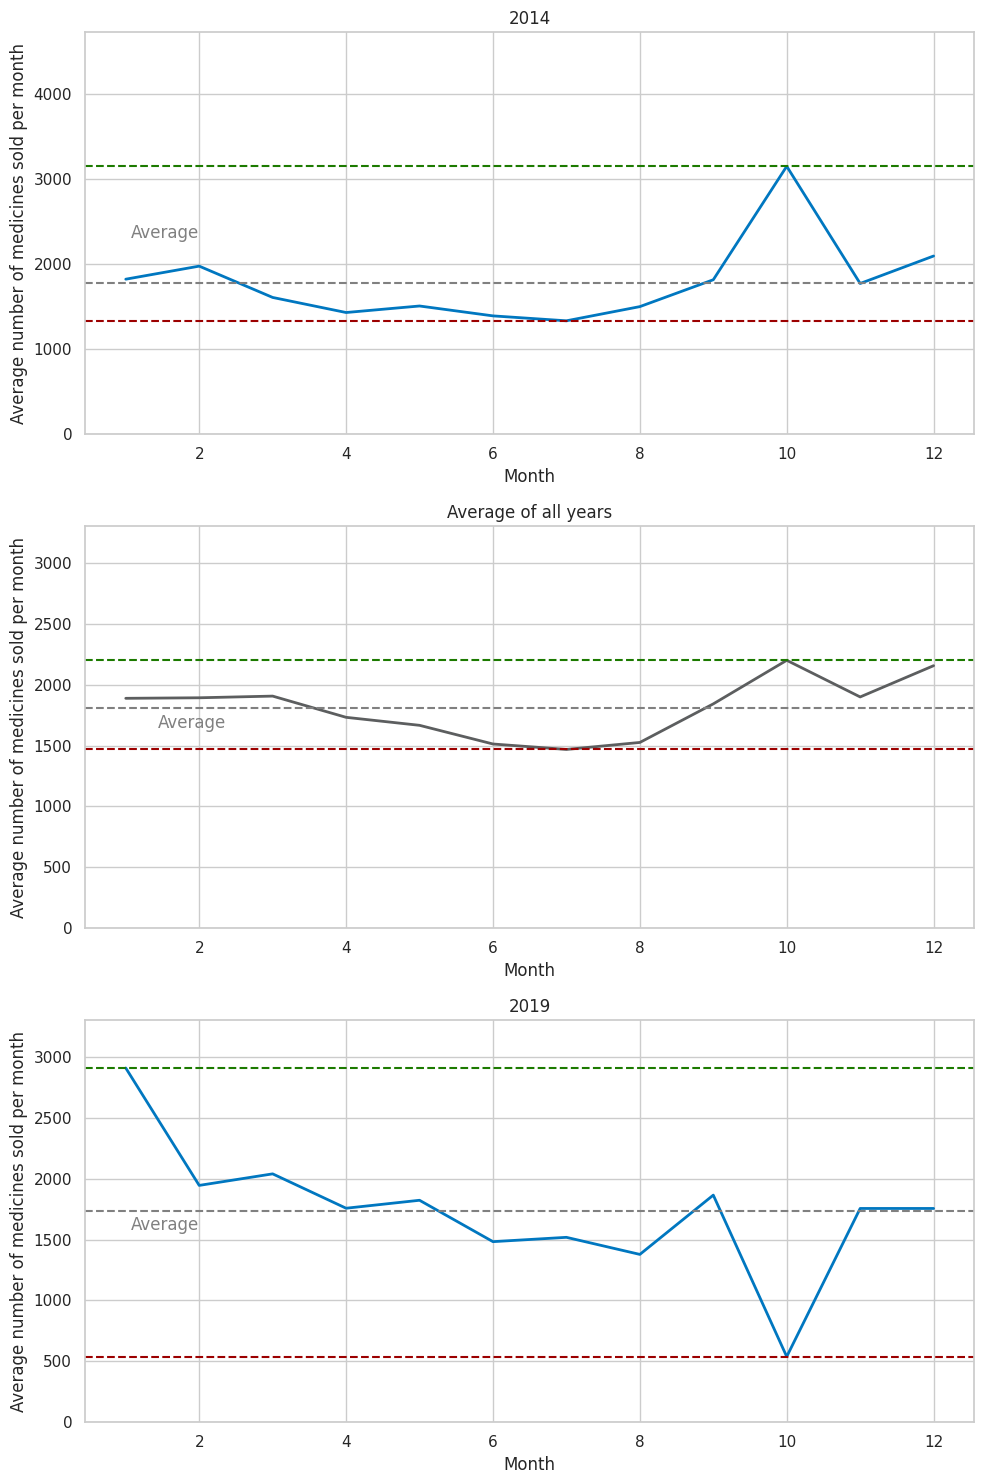

In [ ]:
plt.figure(figsize=(10, 15))  # Defining the figure size

# Data for 2014
df_2y2014 = df_2y.loc[df_2y['year'] == 2014]
df_2y2014 = df_2y2014.drop('year', axis=1)
df_2y2014 = df_2y2014.set_index('month')
df_2y2014 = df_2y2014.sum(axis=1)

df_2y2014 = pd.DataFrame(df_2y2014)
df_2y2014 = df_2y2014.rename(columns={0: 'total'})

# Data for 2019
df_2y2019 = df_2y.loc[df_2y['year'] == 2019]
df_2y2019 = df_2y2019.drop('year', axis=1)
df_2y2019 = df_2y2019.set_index('month')
df_2y2019 = df_2y2019.sum(axis=1)

df_2y2019 = pd.DataFrame(df_2y2019)
df_2y2019 = df_2y2019.rename(columns={0: 'total'})

# Plot for 2014
plt.subplot(3, 1, 1)
df_2y2014ax = sns.lineplot(x=df_2y2014.index, y=df_2y2014.total, color='#0077C0', lw=2)
df_2y2014ax.set(xlabel='Month', ylabel='Average number of medicines sold per month')
plt.ylim(0, df_2y2014['total'].max() * 1.5)
plt.axhline(df_2y2014.total.mean(), xmin=0, xmax=1, color='grey', ls='--')
plt.axhline(df_2y2014.total.max(), xmin=0, xmax=1, color='#1C7A00', ls='--')
plt.axhline(df_2y2014.total.min(), xmin=0, xmax=1, color='#9C0000', ls='--')
plt.text(0.09, 0.50, 'Average', horizontalalignment='center', verticalalignment='center', transform=df_2y2014ax.transAxes, color='grey')
plt.title('2014')

# Plot for Average of all years
plt.subplot(3, 1, 2)
df2ax = sns.lineplot(x=df_2a.index, y=df_2a.total, color='#5C5E5F', lw=2)
df2ax.set(xlabel='Month', ylabel='Average number of medicines sold per month')
plt.ylim(0, df_2a['total'].max() * 1.5)
plt.axhline(df_2a.total.mean(), xmin=0, xmax=1, color='grey', ls='--')
plt.axhline(df_2a.total.max(), xmin=0, xmax=1, color='#1C7A00', ls='--')
plt.axhline(df_2a.total.min(), xmin=0, xmax=1, color='#9C0000', ls='--')
plt.text(0.12, 0.51, 'Average', horizontalalignment='center', verticalalignment='center', transform=df2ax.transAxes, color='grey')
plt.title('Average of all years')

# Plot for 2019
plt.subplot(3, 1, 3)
df_2y2019ax = sns.lineplot(x=df_2y2019.index, y=df_2y2019.total, color='#0077C0', lw=2)
df_2y2019ax.set(xlabel='Month', ylabel='Average number of medicines sold per month')
plt.ylim(0, df_2a['total'].max() * 1.5)
plt.axhline(df_2y2019.total.mean(), xmin=0, xmax=1, color='grey', ls='--')
plt.axhline(df_2y2019.total.max(), xmin=0, xmax=1, color='#1C7A00', ls='--')
plt.axhline(df_2y2019.total.min(), xmin=0, xmax=1, color='#9C0000', ls='--')
plt.text(0.09, 0.49, 'Average', horizontalalignment='center', verticalalignment='center', transform=df_2y2019ax.transAxes, color='grey')
plt.title('2019')

plt.tight_layout()  # Automatically adjusts the spacing between subplots to avoid overlap

plt.show()


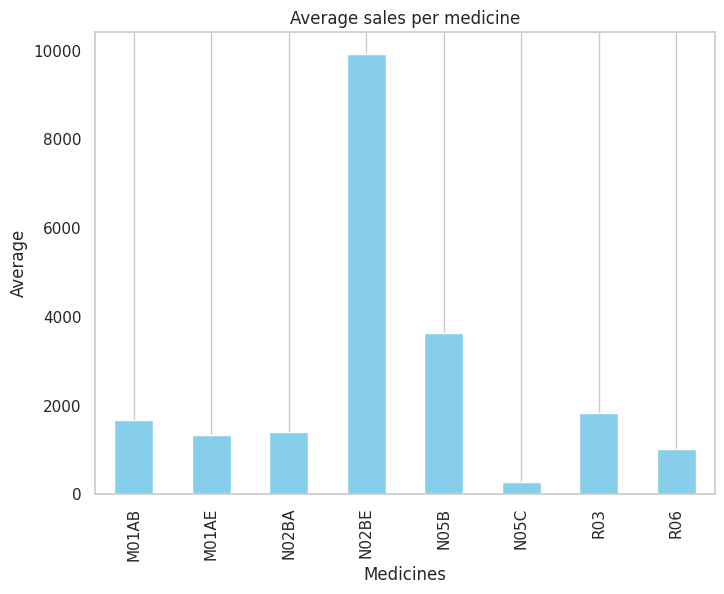

In [ ]:
# Creating the bar chart
mean_values = df_1.mean()

plt.figure(figsize=(8, 6))
mean_values.plot(kind='bar', color='skyblue')
plt.xlabel('Medicines')
plt.ylabel('Average')
plt.title('Average sales per medicine')
plt.grid(axis='y')

plt.show()


In [ ]:
#Let's use the sample dataset we made in the previous topic
df_2['total'] = df_2.sum(axis=1)
df_2

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,total
month,,,,,,,,,
1,124.54,114.94,111.07,1032.26,265.03,22.00,178.04,39.58,1887.46
2,137.44,127.63,127.48,993.83,248.40,15.17,195.17,46.73,1891.85
3,152.28,123.14,123.81,927.92,256.23,19.33,204.17,98.72,1905.60
4,153.54,107.70,112.32,776.82,239.90,15.50,184.50,141.12,1731.40
5,150.23,113.14,115.19,714.66,235.30,18.83,163.33,155.09,1665.77
6,141.44,107.04,115.95,624.25,242.50,17.67,130.50,133.11,1512.46
7,164.58,117.02,107.98,610.26,257.27,14.83,91.67,104.12,1467.73
8,169.95,112.36,107.79,654.82,281.67,19.00,96.17,83.38,1525.14
9,150.15,119.10,102.89,960.86,277.22,15.67,138.67,77.20,1841.76


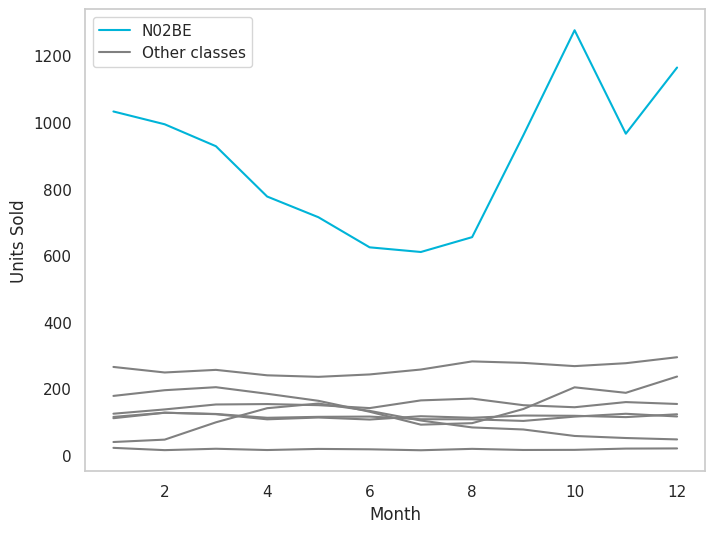

In [ ]:
# Creating the plot with the desired size
fig, ax = plt.subplots(figsize=(8, 6))  #


medications = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']
colors = ['gray'] * len(medications)


index_n02be = medications.index('N02BE')

colors[index_n02be] = '#00B4D8'


df_2[medications].plot(ax=ax, color=colors)


ax.grid(False)


ax.set_xlabel('Month')
ax.set_ylabel('Units Sold')


legend_n02be = plt.Line2D([0], [0], color='#00B4D8', label='N02BE')
legend_others = plt.Line2D([0], [0], color='gray', label='Other classes')


ax.legend(handles=[legend_n02be, legend_others])

plt.show()


In [ ]:

#Finally, let's analyze the monthly sales trend for the most and least sold classes of medicines.
#To do this, let's analyze our start-point and our end-point again
df_2yb = deepcopy(df_2y)
df_2yb = df_2yb.loc[:,['N02BE', 'N05C', 'month', 'year']]
df_2yb = df_2yb.loc[(df_2yb.year==2014) | (df_2yb.year==2019)]
df_2yb

,N02BE,N05C,month,year
0,878.0300,50.0,1,2014
1,1001.9000,31.0,2,2014
2,779.2750,20.0,3,2014
3,698.5000,18.0,4,2014
4,628.7800,23.0,5,2014
5,548.2250,23.0,6,2014
6,491.9000,21.0,7,2014
7,583.8500,29.0,8,2014
8,887.8200,14.0,9,2014
9,1856.8150,30.0,10,2014


Text(0.5, 1.0, 'N02BE')

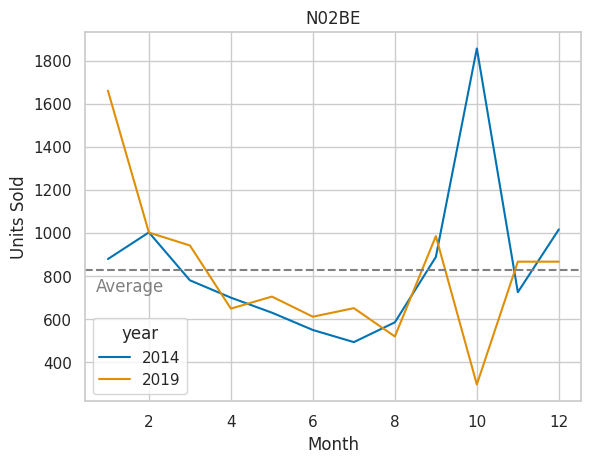

In [ ]:
# Below, we will analyze the most sold drug class over the months, N02BE
yx1 = sns.lineplot(x='month', y='N02BE', data=df_2yb, hue='year', palette='colorblind')

yx1.set(xlabel='Month', ylabel='Units Sold')
plt.axhline(df_2yb.N02BE.mean(), xmin=0, xmax=1, color='grey', **{'ls':'--'})
plt.text(0.09, 0.31, 'Average', horizontalalignment='center',
     verticalalignment='center', transform=yx1.transAxes, color='grey')
plt.title('N02BE')


Text(0.5, 1.0, 'N05C')

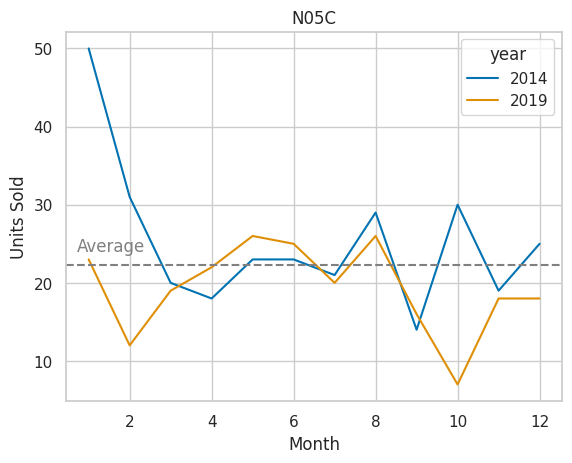

In [ ]:
yx2 = sns.lineplot(x='month', y='N05C', data=df_2yb, hue='year', palette='colorblind')
yx2.set(xlabel='Month', ylabel='Units Sold')
plt.axhline(df_2yb.N05C.mean(), xmin=0, xmax=1, color='grey', **{'ls':'--'})
plt.text(0.09, 0.42, 'Average', horizontalalignment='center',
     verticalalignment='center', transform=yx2.transAxes, color='grey')
plt.title('N05C')


In [ ]:
df_2

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,total
month,,,,,,,,,
1,124.54,114.94,111.07,1032.26,265.03,22.00,178.04,39.58,1887.46
2,137.44,127.63,127.48,993.83,248.40,15.17,195.17,46.73,1891.85
3,152.28,123.14,123.81,927.92,256.23,19.33,204.17,98.72,1905.60
4,153.54,107.70,112.32,776.82,239.90,15.50,184.50,141.12,1731.40
5,150.23,113.14,115.19,714.66,235.30,18.83,163.33,155.09,1665.77
6,141.44,107.04,115.95,624.25,242.50,17.67,130.50,133.11,1512.46
7,164.58,117.02,107.98,610.26,257.27,14.83,91.67,104.12,1467.73
8,169.95,112.36,107.79,654.82,281.67,19.00,96.17,83.38,1525.14
9,150.15,119.10,102.89,960.86,277.22,15.67,138.67,77.20,1841.76


<Axes: >

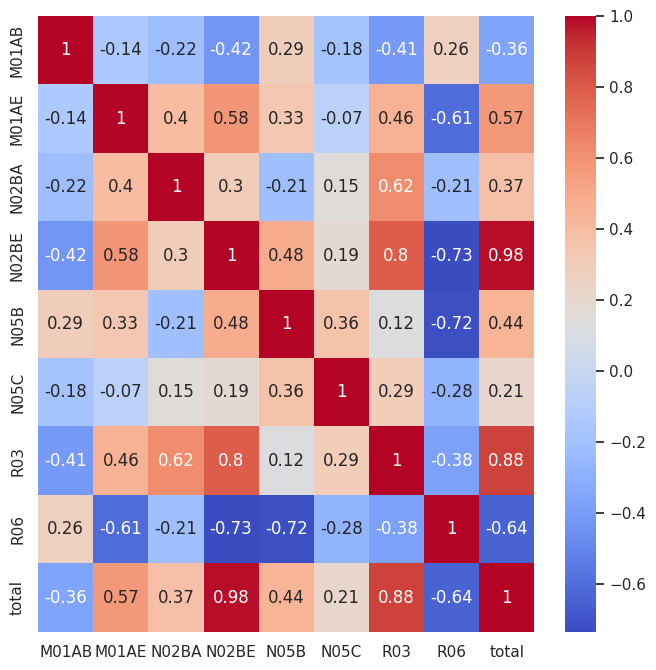

In [ ]:
#To analyze whether there is a correlation between the monthly sales of drug classes, we will use the heatmap for correlation values.
plt.figure(figsize=(8, 8))
sns.heatmap(df_2.corr(), annot=True, cmap="coolwarm")